# Membaca Data

In [472]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [473]:
import warnings; warnings.simplefilter('ignore')

In [474]:
!pip install kmodes

In [475]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

In [476]:
import pickle

In [477]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/JuliaPuspaDwiMaula1905/data-MixItup-CaseStudy/refs/heads/main/Case-Study-02-MixITup.csv

mkdir: cannot create directory ‘data’: File exists
--2025-10-20 17:24:51--  https://raw.githubusercontent.com/JuliaPuspaDwiMaula1905/data-MixItup-CaseStudy/refs/heads/main/Case-Study-02-MixITup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [text/plain]
Saving to: ‘data/Case-Study-02-MixITup.csv.8’

Case-Study-02-MixIT 100%[===================>]   9.81K  --.-KB/s    in 0s      

2025-10-20 17:24:51 (83.9 MB/s) - ‘data/Case-Study-02-MixITup.csv.8’ saved [10044/10044]



In [478]:
df = pd.read_csv("data/Case-Study-02-MixITup.csv", sep=';')
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,Rp13.114.754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,Rp33.606.557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,Rp15.983.606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,Rp12.704.918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,Rp20.081.967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,Rp4.098.360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,Rp15.983.606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,Rp43.032.786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,Rp1.229.508,94,1,Depok,0.0,Selasa,0


# Preprocessing

In [479]:
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,Rp13.114.754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,Rp33.606.557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,Rp15.983.606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,Rp12.704.918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,Rp20.081.967,42,1,Jakarta,2.0,Senin,8


In [480]:
df.duplicated().sum()

np.int64(0)

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    object 
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.8+ KB


In [482]:
# Menghapus Kolom 'ID'
df.drop(columns=['ID'], inplace=True)

In [483]:
# Menampilkan isi data pada kolom 'Jenis Kelamin'
df['Jenis Kelamin'].value_counts(dropna=False)
df['Jenis Kelamin'].info()
df['Jenis Kelamin'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Jenis Kelamin
Non-Null Count  Dtype 
--------------  ----- 
196 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


array(['Wanita', 'Pria', nan, '-'], dtype=object)

In [484]:
# Menangani missing values pada kolom 'Jenis Kelamin'
df['Jenis Kelamin'].replace('-', pd.NA, inplace=True)  # ubah '-' menjadi NaN
df['Jenis Kelamin'].fillna(df['Jenis Kelamin'].mode()[0], inplace=True)  # isi dengan modus

# Ubah menjadi kategorik
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')

In [485]:
# Menampilkan isi data pada kolom 'Umur'
df['Umur'].value_counts(dropna=False)
df['Umur'].info()
df['Umur'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Umur
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


array(['49', '32', '51', '19', '38', '33', '27', '24', '21', '31', '36',
       '46', '60', '58', '47', '45', '22', '18', '59', '44', '39', '35',
       '20', '30', '23', '48', '37', '40', '34', '41', '53', '54', '28',
       '55', '25', '50', '42', '29', '43', '52', '2', "35'", '56', '26',
       '57'], dtype=object)

In [486]:
# Ubah semua ke string (agar bisa dibersihkan)
df['Umur'] = df['Umur'].astype(str)

# Hapus karakter yang mengganggu: tanda kutip, huruf, spasi, dsb.
df['Umur'] = df['Umur'].str.replace("'", "", regex=False)      # hapus tanda kutip tunggal
df['Umur'] = df['Umur'].str.replace('"', "", regex=False)      # hapus tanda kutip ganda
df['Umur'] = df['Umur'].str.replace('[^0-9]', '', regex=True)  # sisakan hanya angka

# Mengubah tipe data menjadi numerik
df['Umur'] = pd.to_numeric(df['Umur'], errors='coerce')

# Cek hasil konversi
print(df['Umur'].dtypes)
print(df['Umur'].isnull().sum())

int64
0


In [487]:
# Lihat baris dengan Umur = 2
df[df['Umur'] == 2]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
119,Pria,2,Rp18.032.786,41,0,Jakarta,2.0,Senin,0


In [488]:
# Mengganti nilai yang tidak valid (misal 2) dengan NaN
df.loc[df['Umur'] < 10, 'Umur'] = np.nan # Misal umur < 10 dianggap error

# Mengisi NaN dengan median
df['Umur'] = df['Umur'].fillna(df['Umur'].median()).astype(int)

In [489]:
# Menampilkan isi data pada kolom 'Pendapatan-per-bulan'
df['Pendapatan-per-bulan'].value_counts(dropna=False)
df['Pendapatan-per-bulan'].info()
df['Pendapatan-per-bulan'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Pendapatan-per-bulan
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


array(['Rp13.114.754', 'Rp33.606.557', 'Rp15.983.606', 'Rp12.704.918',
       'Rp20.081.967', 'Rp29.098.360', 'Rp21.311.475', 'Rp2.049.180',
       'Rp13.524.590', 'Rp19.262.295', 'Rp11.475.409', 'Rp29.508.196',
       'Rp34.016.393', 'Rp6.147.540', 'Rp11.885.245', 'Rp25.819.672',
       'Rp25.000.000', 'Rp5.327.868', 'Rp9.836.065', 'Rp23.770.491',
       'Rp22.950.819', 'Rp1.229.508', 'Rp9.016.393', 'Rp9.426.229',
       'Rp29.918.032', 'Rp28.688.524', 'Rp27.049.180', 'Rp18.442.622',
       'Rp19.672.131', 'Rp11.065.573', 'Rp36.065.573', 'Rp20.491.803',
       'Rp17.622.950', 'Rp409.836', 'Rp25.409.836', 'Rp1.639.344',
       'Rp5.737.704', 'Rp34.426.229', 'Rp10.245.901', 'Rp50.000.000',
       'Rp14.344.262', 'Rp35.245.901', 'Rp7.377.049', 'Rp45.491.803',
       'Rp40.163.934', 'Rp17.213.114', 'Rp23.360.655', 'Rp7.786.885',
       'Rp18.852.459', 'Rp22.131.147', 'Rp3.688.524', 'Rp2.459.016',
       'Rp3.278.688', 'Rp18.032.786', 'Rp24.180.327', 'Rp22.540.983',
       'Rp819.672', 'Rp

In [490]:
# Hapus "Rp" dan titik, lalu ubah ke integer
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('Rp', '', regex=False)
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('.', '', regex=False)
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype(int)

In [491]:
# Menampilkan isi data pada kolom 'skor-pengeluaran'
df['skor-pengeluaran'].value_counts(dropna=False)
df['skor-pengeluaran'].info()
df['skor-pengeluaran'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: skor-pengeluaran
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


array([ 52,  86,  41,  55,  42,  95,  56,  77,  47,  54,  92,  15,   4,
        50,  16,  87,  32,  28,  79,  59,  60,   7,  75,  57,   6,  73,
        69,  40,   5,  89,  49,  13,  88,  48,  10,  36,   3,  31,  39,
        46,  83,  68,  14,  24,  65,  91,  61,  90,  58,  93,  34,  44,
        17,  53,  97,  27,  11,  43,  22,  18,  35,  99,  66,  29,   9,
        45,  23,  82, 101,  51,  20,  72,  71,   1,  81,  98,  26,  76,
        78,  63,  74,  85,  12,   8,  94])

In [492]:
# Megganti nilai yang tidak valid menjadi 100
df.loc[df['skor-pengeluaran'] > 100, 'skor-pengeluaran'] = 100
print(df['skor-pengeluaran'].max())

100


In [493]:
# Menampilkan isi data pada kolom 'Menikah'
df['Menikah'].value_counts(dropna=False)
df['Menikah'].info()
df['Menikah'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Menikah
Non-Null Count  Dtype 
--------------  ----- 
188 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


array(['1', '0', nan, ' ', '-'], dtype=object)

In [494]:
# Ganti spasi kosong dan '-' menjadi NaN
df['Menikah'] = df['Menikah'].replace([' ', '-'], np.nan)

In [495]:
# Menangani missing values pada kolom 'Menikah'
df['Menikah'].fillna(df['Menikah'].mode()[0], inplace=True)

# Ubah tipe data ke kategori
df['Menikah'] = df['Menikah'].astype('category')

In [496]:
# Menampilkan isi data pada kolom 'Kota'
df['Kota'].value_counts(dropna=False)
df['Kota'].info()
df['Kota'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Kota
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


array(['Jakarta', 'Depok', 'Tangerang', 'JJakarta'], dtype=object)

In [497]:
# Mengubah 'JJakarta' menjadi 'Jakarta'
df['Kota'] = df['Kota'].replace('JJakarta', 'Jakarta')

In [498]:
# Mengubah menjadi kategori
df['Kota'] = df['Kota'].astype('category')

In [499]:
# Menampilkan isi data pada kolom 'Promo'
df['Promo'].value_counts(dropna=False)
df['Promo'].info()
df['Promo'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Promo
Non-Null Count  Dtype  
--------------  -----  
194 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


array([ 1.,  2.,  0., nan,  3.,  5.])

In [500]:
# Ganti nilai yang tidak valid (misal 5) dengan NaN
df['Promo'] = df['Promo'].replace(5, np.nan)

# Imputasi NaN dengan modus (nilai yang paling sering muncul)
modus = df['Promo'].mode()[0]
df['Promo'] = df['Promo'].fillna(modus)

In [501]:
# Mengubah menjadi kategori
df['Promo'] = df['Promo'].astype('category')

In [502]:
# Menampilkan isi data pada kolom 'HariFav'
df['HariFav'].value_counts(dropna=False)
df['HariFav'].info()
df['HariFav'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: HariFav
Non-Null Count  Dtype 
--------------  ----- 
200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


array(['Sabtu', 'Minggu', 'Rabu', 'Senin', 'Selasa', 'Jumat', 'Kamis'],
      dtype=object)

In [503]:
# Mengubah menjadi kategori
df['HariFav'] = df['HariFav'].astype('category')

In [504]:
# Menampilkan isi data pada kolom 'FavFlavor'
df['FavFlavor'].value_counts(dropna=False)
df['FavFlavor'].info()
df['FavFlavor'].unique()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: FavFlavor
Non-Null Count  Dtype
--------------  -----
200 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


array([2, 6, 3, 7, 8, 0, 5, 4, 1, 9])

In [505]:
# Melihat baris dengan yang kolom 'FavFlavor' nya berisi angka 9
df[df['FavFlavor'] == 9]

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
130,Wanita,44,25819672,20,1,Tangerang,3.0,Sabtu,9


In [506]:
# Mengganti NaN
import numpy as np
df.loc[df['FavFlavor'] == 9, 'FavFlavor'] = np.nan

In [507]:
# Mengisi dengan modus
mode_flavor = df['FavFlavor'].mode()[0]
df['FavFlavor'].fillna(mode_flavor, inplace=True)

# Mengubah menjadi kategori
df['FavFlavor'] = df['FavFlavor'].astype('category')

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         200 non-null    category
 1   Umur                  200 non-null    int64   
 2   Pendapatan-per-bulan  200 non-null    int64   
 3   skor-pengeluaran      200 non-null    int64   
 4   Menikah               200 non-null    category
 5   Kota                  200 non-null    category
 6   Promo                 200 non-null    category
 7   HariFav               200 non-null    category
 8   FavFlavor             200 non-null    category
dtypes: category(6), int64(3)
memory usage: 7.3 KB


# EDA

In [509]:
df.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2.0
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6.0
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3.0
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7.0
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8.0


In [510]:
# Menampilkan statistik deskriptif kolom numerik
df.describe()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
count,200.000000,2.000000e+02,200.000000
mean,37.525000,1.867213e+07,50.465000
std,11.726763,1.076423e+07,26.061365
min,18.000000,0.000000e+00,1.000000
25%,29.000000,1.086066e+07,34.750000
50%,36.000000,1.905738e+07,50.000000
75%,48.000000,2.581967e+07,73.000000
max,60.000000,5.000000e+07,100.000000


In [511]:
# Statistik kategorik
for col in ['Jenis Kelamin', 'Menikah', 'Kota', 'HariFav', 'Promo', 'FavFlavor']:
    print(df[col].value_counts(dropna=False))

Jenis Kelamin
Wanita    114
Pria       86
Name: count, dtype: int64
Menikah
1    174
0     26
Name: count, dtype: int64
Kota
Jakarta      88
Depok        59
Tangerang    53
Name: count, dtype: int64
HariFav
Senin     66
Sabtu     54
Minggu    43
Selasa    21
Kamis      6
Jumat      5
Rabu       5
Name: count, dtype: int64
Promo
1.0    93
3.0    50
2.0    43
0.0    14
Name: count, dtype: int64
FavFlavor
0.0    41
1.0    20
2.0    20
3.0    20
4.0    20
5.0    20
6.0    20
7.0    20
8.0    19
Name: count, dtype: int64


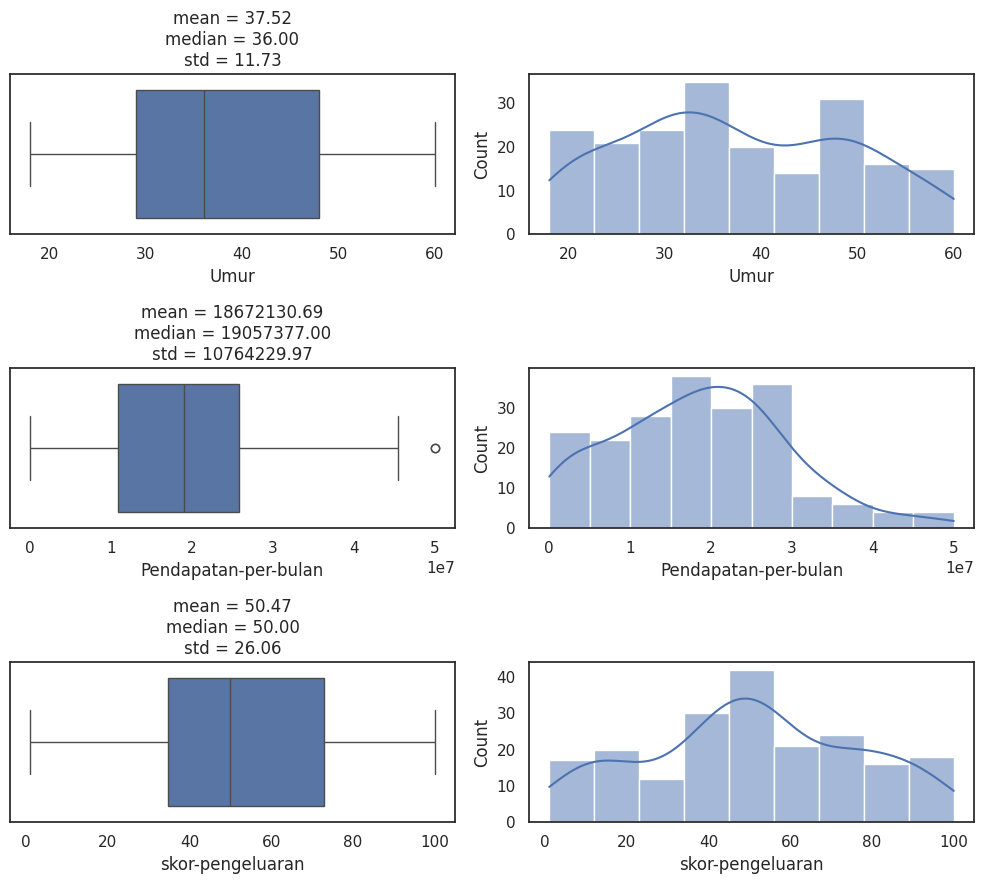

In [512]:
kolom_numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

# Mengatur style untuk seaborn
sns.set(style='white')

# Fungsi untuk membuat plot observasi data numerik
def observasi_num(features):
    fig, axs = plt.subplots(len(features), 2, figsize=(10, 9))  # Sesuaikan ukuran subplot dengan jumlah fitur
    for i, kol in enumerate(features):
        sns.boxplot(x=df[kol], ax=axs[i, 0])  # Plot boxplot
        sns.histplot(df[kol], kde=True, ax=axs[i, 1])  # Plot distribusi (distplot diganti dengan histplot karena distplot deprecated)

        # Menambahkan informasi statistik ke judul boxplot
        axs[i, 0].set_title('mean = %.2f\nmedian = %.2f\nstd = %.2f' %
                            (df[kol].mean(), df[kol].median(), df[kol].std()))

    plt.tight_layout()  # Supaya layout lebih rapih
    plt.show()

# Memanggil fungsi untuk membuat plot untuk data numerik
observasi_num(kolom_numerik)

1. Segmentasi Berdasarkan Usia

Dari boxplot dan histogram umur, terlihat bahwa mayoritas pelanggan MixITup berada di rentang usia 30 hingga 50 tahun, dengan usia rata-rata 37,52 tahun dan median 36 tahun. Distribusi usia juga menunjukkan adanya variasi yang cukup merata di seluruh kelompok usia.

Rekomendasi:

Marketing pemasaran yang relevan untuk usia 30-50 tahun: Fokuskan promosi pada produk yang menarik bagi kelompok ini, seperti penawaran "premium" yang menonjolkan kenyamanan dan gaya hidup. Program loyalitas yang personal: Berikan penawaran spesial saat momen penting, seperti diskon pada hari ulang tahun, program loyalitas berbasis milestone (misalnya, setelah pembelian dalam jumlah tertentu), atau promosi yang menargetkan kebutuhan keluarga seperti produk keluarga dan anak-anak.

2. Segmentasi Berdasarkan Pendapatan

Dari boxplot pendapatan per bulan, terlihat rentang pendapatan yang sangat luas, dari kurang dari 1 juta hingga sekitar 50 juta rupiah. Rata-rata pendapatan bulanan adalah sekitar 18,7 juta rupiah dengan median 19,1 juta rupiah, yang menunjukkan bahwa mayoritas pel anggan MixITup berada di segmen menengah hingga atas.

Rekomendasi:

Penawaran produk yang sesuai dengan segmen pendapatan: Untuk pelanggan dengan pendapatan rendah, tawarkan produk dengan harga terjangkau, seperti paket hemat atau diskon menarik. Sementara itu, untuk pelanggan berpendapatan tinggi, ciptakan layanan atau produk premium seperti pengalaman eksklusif, layanan personalisasi, atau langganan premium. Dynamic pricing: Sesuaikan penawaran berdasarkan kemampuan finansial pelanggan. Misalnya, bundling produk atau diskon untuk kelompok tertentu, sambil tetap menawarkan layanan eksklusif bagi pelanggan dengan pendapatan lebih tinggi.

3. Segmentasi Berdasarkan Skor Pengeluaran

Data skor pengeluaran menunjukkan rata-rata pengeluaran di sekitar 50 dengan standar deviasi sekitar 26,06. Hal ini mengindikasikan adanya variasi besar dalam pola belanja pelanggan MixITup.

Rekomendasi:

Paket belanja sesuai perilaku konsumen: Ciptakan program yang dapat mendorong pelanggan dengan skor pengeluaran rendah untuk berbelanja lebih banyak, seperti promosi berbasis insentif atau diskon berjenjang. Sementara itu, bagi pelanggan dengan skor pengeluaran tinggi, tawarkan reward atau layanan eksklusif sebagai penghargaan atas loyalitas mereka.

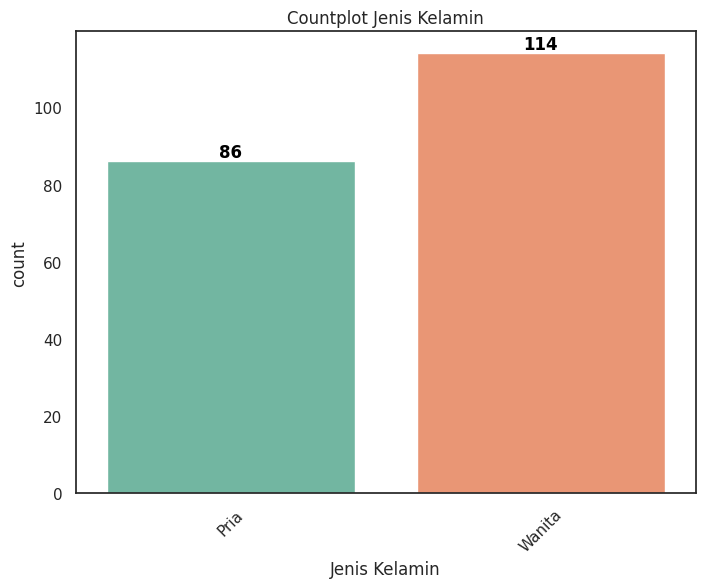

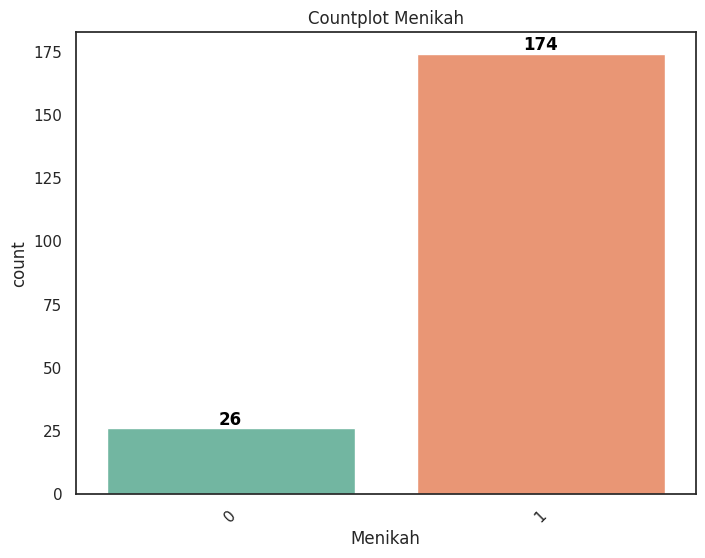

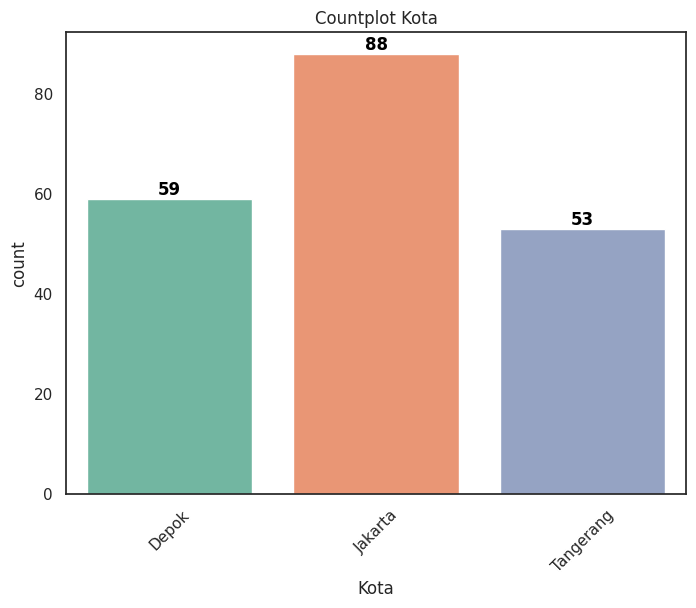

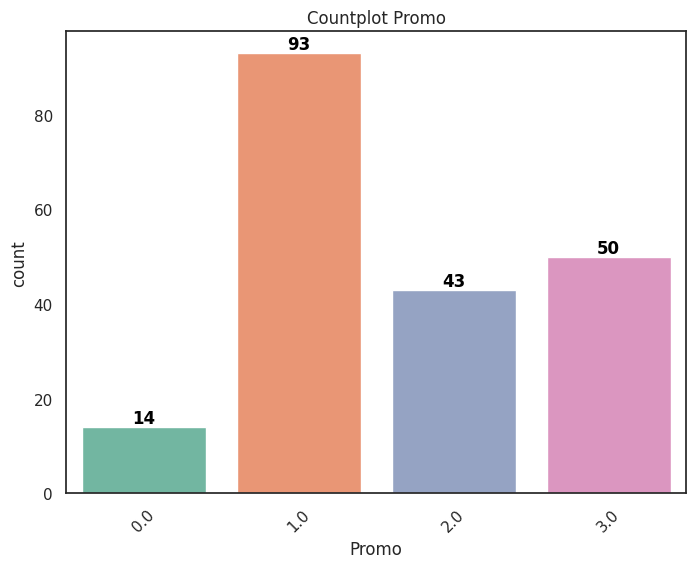

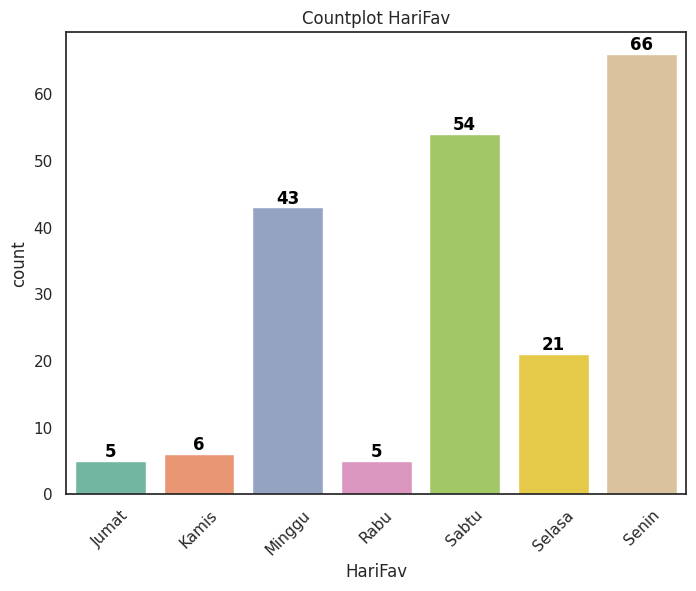

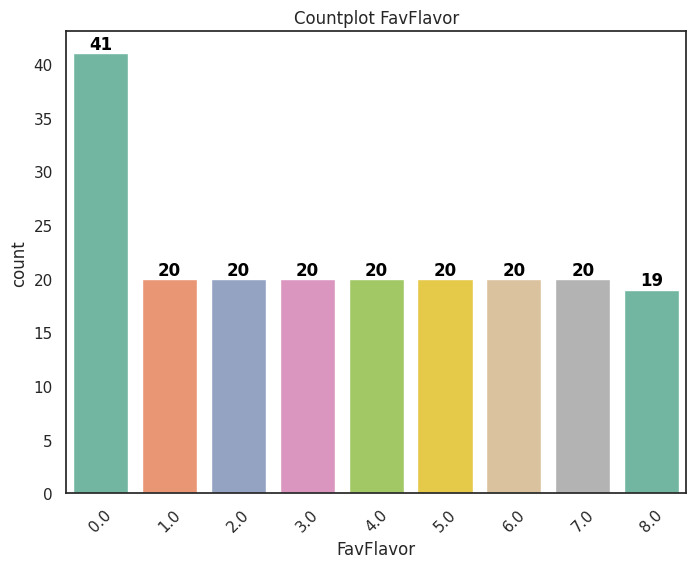

In [513]:
# Daftar kolom kategorik
kolom_kategorik = ['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']

# Loop untuk membuat countplot dan menampilkan total di atas setiap bar
for kolom in kolom_kategorik:
    plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
    ax = sns.countplot(x=kolom, data=df, hue=kolom, palette='Set2', legend=False)  # Memperbaiki penggunaan palette

    # Menambahkan total frekuensi (integer) di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

    plt.title(f'Countplot {kolom}')
    plt.xticks(rotation=45)  # Rotasi label jika diperlukan
    plt.show()


*1. Jenis Kelamin*

Jumlah pelanggan *wanita (114)* lebih banyak dibanding *pria (86)*. Hal ini menunjukkan bahwa segmen wanita mendominasi, sehingga promosi dan produk dapat difokuskan pada preferensi konsumen wanita.

---

*2. Menikah*

Sebagian besar pelanggan *sudah menikah (174), sedangkan yang **belum menikah hanya 26*. Artinya, kelompok pelanggan menikah menjadi target utama, berpotensi karena memiliki daya beli lebih stabil dan kebutuhan keluarga lebih besar.

---

*3. Kota*

Pelanggan paling banyak berasal dari *Jakarta (88), diikuti **Depok (59)* dan *Tangerang (53)*. Ini menunjukkan bahwa Jakarta adalah pasar utama, namun dua kota lainnya tetap potensial untuk ekspansi.

---
*4. Promo*

Promo *tipe 1.0* paling banyak digunakan (*93 pelanggan), sedangkan promo **0.0* paling sedikit (*14 pelanggan*). Promo 1.0 terbukti paling menarik, sementara promo lain dapat ditingkatkan efektivitasnya.

---

*5.Hari Favorit (HariFav)*

Hari paling disukai pelanggan adalah *Senin (66), diikuti **Sabtu (54)* dan *Minggu (43), sedangkan **Rabu dan Jumat* paling sepi (*5 pelanggan*). Aktivitas pembelian tinggi di awal dan akhir minggu dapat dimanfaatkan untuk strategi promosi.

---
*6. Favorit Flavor (FavFlavor)*

Flavor *0.0* menjadi yang paling populer (*41 pelanggan), sedangkan flavor lainnya relatif seimbang (19–20 pelanggan*). Ini menandakan adanya satu flavor unggulan, namun variasi rasa lain tetap diminati pelanggan.

---

# Customer Segmentation

In [514]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standarisasi
Data_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
Data_std = pd.DataFrame(data=Data_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(Data_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(Data_std.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  200.0                 200.0             200.0
mean    37.5            18672130.7              50.5
std     11.7            10764230.0              26.1
min     18.0                   0.0               1.0
25%     29.0            10860655.0              34.8
50%     36.0            19057377.0              50.0
75%     48.0            25819672.0              73.0
max     60.0            50000000.0             100.0

Hasil Standarisasi

       Umur  Pendapatan-per-bulan  skor-pengeluaran
0  0.980986             -0.517577          0.059047
1 -0.472327              1.390894          1.366934
2  1.151965             -0.250391         -0.364093
3 -1.583684             -0.555747          0.174449
4  0.040607              0.131303         -0.325625

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  200.0                 200.0             200.0
mean     0.0         

Sebelum standarisasi, setiap variabel memiliki skala yang berbeda jauh — misalnya Pendapatan dalam jutaan rupiah sedangkan Skor Pengeluaran hanya 1–100.
Hal ini bisa menyebabkan algoritma clustering (misalnya K-Means) lebih condong ke variabel dengan nilai besar (Pendapatan), sehingga hasil cluster bisa tidak seimbang.

Setelah standarisasi, semua variabel memiliki rata-rata (mean) mendekati 0 dan simpangan baku (std) ≈ 1, artinya data sudah:

*   Berada dalam skala yang sama, dan
*   Siap digunakan untuk algoritma berbasis jarak seperti K-Means, Hierarchical Clustering, atau DBSCAN.

Tidak ada lagi variabel yang “mendominasi” hasil perhitungan jarak antar data.

In [515]:
# Membuat salinan data frame
Data_encode = df[kolom_kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kolom_kategorik:
    Data_encode[col] = LabelEncoder().fit_transform(Data_encode[col])

# Menampilkan data
print(Data_encode.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor
0              1        1     1      1        4          2
1              1        1     0      1        2          6
2              0        1     1      2        2          3
3              0        0     1      1        3          7
4              1        1     1      2        6          8


Kode ini digunakan untuk mengonversi data kategorik menjadi data numerik menggunakan Label Encoder. Proses dimulai dengan membuat salinan dari kolom-kolom kategorik dalam dataset, sehingga data asli tetap utuh. Selanjutnya, setiap kolom tersebut diproses dengan loop untuk menerapkan LabelEncoder, yang mengubah kategori teks menjadi angka. Setelah proses encoding selesai, kode menampilkan lima baris pertama dari data yang telah diubah, menunjukkan bahwa kolom-kolom seperti "Jenis Kelamin" dan "Kota" sekarang dalam format numerik.

In [516]:
# Menggabungkan data frame
Data_model = Data_encode.merge(Data_std, left_index = True, right_index=True, how = 'left')
print(Data_model.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
0              1        1     1      1        4          2  0.980986   
1              1        1     0      1        2          6 -0.472327   
2              0        1     1      2        2          3  1.151965   
3              0        0     1      1        3          7 -1.583684   
4              1        1     1      2        6          8  0.040607   

   Pendapatan-per-bulan  skor-pengeluaran  
0             -0.517577          0.059047  
1              1.390894          1.366934  
2             -0.250391         -0.364093  
3             -0.555747          0.174449  
4              0.131303         -0.325625  


In [517]:
Data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         200 non-null    int64  
 1   Menikah               200 non-null    int64  
 2   Kota                  200 non-null    int64  
 3   Promo                 200 non-null    int64  
 4   HariFav               200 non-null    int64  
 5   FavFlavor             200 non-null    int64  
 6   Umur                  200 non-null    float64
 7   Pendapatan-per-bulan  200 non-null    float64
 8   skor-pengeluaran      200 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 14.2 KB


DataFrame gabungan, Data_model, menampilkan kombinasi dari kolom kategorik dan numerik yang telah diproses. Kolom kategorik seperti Jenis Kelamin, Menikah, Kota, Promo, HariFav, dan FavFlavor telah diencoding menjadi nilai numerik, memudahkan analisis lebih lanjut. Sementara itu, kolom numerik seperti Umur, Pendapatan-per-bulan, dan skor-pengeluaran telah distandarisasi, memastikan bahwa semua variabel berada pada skala yang sama.

Selain itu, nilai yang hilang dalam kolom numerik telah diisi dengan median dari kolom tersebut. Analisis korelasi dilakukan untuk mengukur hubungan antar variabel, dan hasilnya menunjukkan adanya beberapa korelasi yang signifikan, baik positif maupun negatif.



   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
0              1        1     1      1        4          2  0.980986   
1              1        1     0      1        2          6 -0.472327   
2              0        1     1      2        2          3  1.151965   
3              0        0     1      1        3          7 -1.583684   
4              1        1     1      2        6          8  0.040607   

   Pendapatan-per-bulan  skor-pengeluaran  
0             -0.517577          0.059047  
1              1.390894          1.366934  
2             -0.250391         -0.364093  
3             -0.555747          0.174449  
4              0.131303         -0.325625  


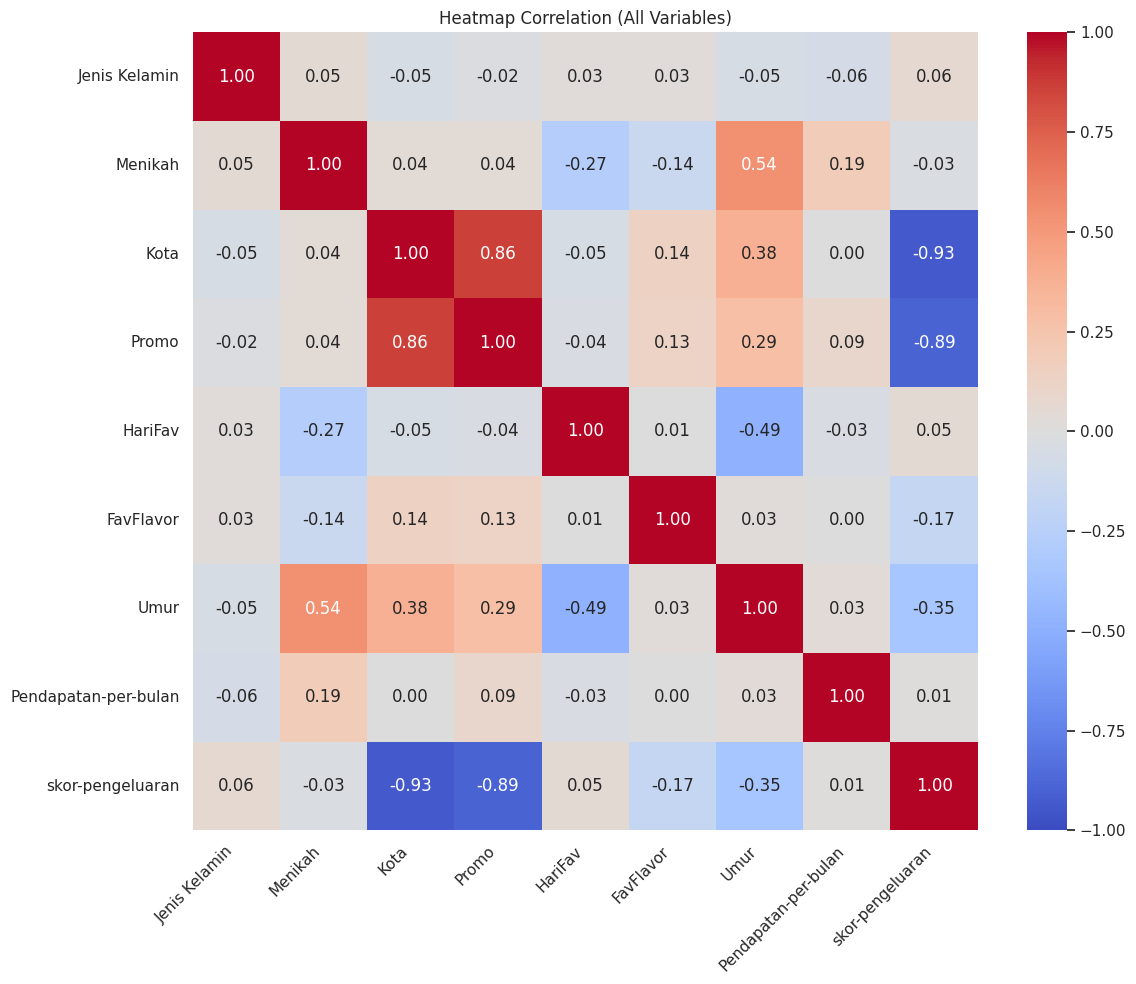

In [518]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Menggabungkan data frame, ensure it's a DataFrame
Data_model = pd.merge(Data_encode, Data_std, left_index=True, right_index=True, how='left')
print(Data_model.head())


# Mengganti nilai yang hilang dengan median untuk kolom numerik
numeric_columns = Data_model.select_dtypes(include=['int64', 'float64']).columns
Data_model[numeric_columns] = Data_model[numeric_columns].fillna(Data_model[numeric_columns].median())

# Hitung korelasi
correlation = Data_model.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Heatmap Correlation (All Variables)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Berdasarkan heatmap korelasi, diketahui bahwa hubungan paling kuat terdapat antara variabel Kota, Promo, Umur, dan Skor Pengeluaran. Korelasi positif antara Kota dan Promo menunjukkan bahwa wilayah tertentu lebih sering mendapatkan promo. Sementara itu, korelasi negatif antara Promo dan Skor Pengeluaran menandakan bahwa semakin banyak promo yang diterima, semakin kecil skor pengeluaran pelanggan. Variabel Jenis Kelamin, FavFlavor, dan HariFav memiliki pengaruh yang sangat lemah terhadap variabel lainnya.

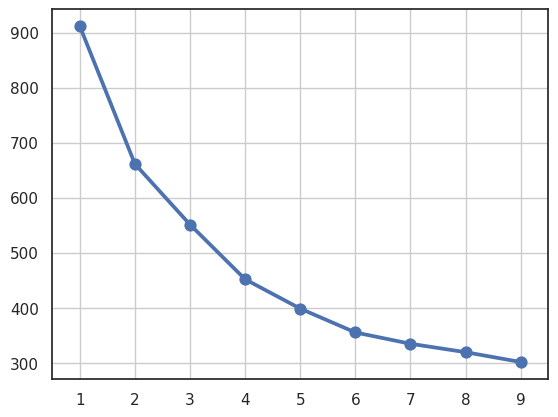

In [519]:
# Melakukan Iterasi untuk mendapatkan nilai Cost
cost = {}
for k in range(1,10):
  kproto_clustering = KPrototypes(n_clusters = k, random_state = 0)
  kproto_clustering.fit_predict(Data_model, categorical = [0,1,2,3,4,5])
  cost[k] = kproto_clustering.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

Penurunan inertia signifikan terjadi saat jumlah cluster meningkat dari 1 hingga sekitar 4 atau 5. Setelah itu, penurunan menjadi lebih lambat, dan grafik mulai mendatar. Titik elbow yang menunjukkan jumlah cluster optimal berada di sekitar 4.

In [520]:
# Membuat model
kproto_clustering = KPrototypes(n_clusters = 4, random_state = 0)
kproto_clustering = kproto_clustering.fit(Data_model, categorical = [0,1,2,3])

#Save Model
pickle.dump(kproto_clustering, open('cluster.pkl', 'wb'))

In [521]:
# Menggunakan model
# Menentukan segmen tiap pelanggan
clusters = kproto_clustering.predict(Data_model, categorical = [0,1,2,3]) # Use Data2_model for prediction
print('Segmen Pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
Data_final = df.copy()
Data_final['cluster'] = clusters
print(Data_final.head(15))

Segmen Pelanggan: [3 0 3 0 1 2 1 2 1 1 1 3 1 3 0 3 3 0 3 0 1 1 3 3 0 2 2 3 1 1 2 3 0 1 2 1 2
 2 0 1 2 2 3 2 2 0 2 0 0 2 0 2 0 3 3 3 3 2 3 3 1 3 3 0 0 3 3 0 2 1 3 3 3 3
 1 0 3 3 2 1 2 3 2 1 3 0 3 1 3 2 0 0 3 2 3 0 0 3 3 0 3 3 1 3 3 1 2 1 1 0 1
 2 1 3 3 3 0 3 2 2 3 0 2 1 3 2 0 0 1 0 3 2 0 1 1 3 1 1 1 2 3 2 1 0 2 0 1 3
 1 0 2 2 0 3 2 2 3 2 1 3 2 1 2 3 2 3 1 1 1 3 1 0 3 1 1 1 1 1 1 3 3 2 3 1 1
 3 1 2 3 0 3 2 1 3 3 2 0 1 2 0]

   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0         Wanita    49              13114754                52       1   
1         Wanita    32              33606557                86       1   
2           Pria    51              15983606                41       1   
3           Pria    19              12704918                55       0   
4         Wanita    38              20081967                42       1   
5         Wanita    33              29098360                95       1   
6           Pria    27              21311475            

In [522]:
# Menampilkan data pelanggan berdasarkan clusternya
for i in range (0,5):
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(Data_final[Data_final['cluster'] == i])


Pelanggan Cluster: 0

    Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
1          Wanita    32              33606557                86       1   
3            Pria    19              12704918                55       0   
14         Wanita    58               2049180                15       1   
17         Wanita    32              25000000                87       1   
19         Wanita    49               9836065                28       1   
24           Pria    39              22950819                75       1   
32         Wanita    36              28688524                75       1   
38           Pria    48              18442622                49       1   
45           Pria    59              15983606                47       1   
47         Wanita    36              29508196                10       1   
48         Wanita    40              18442622                40       1   
50           Pria    49              19262295                56       1   
52

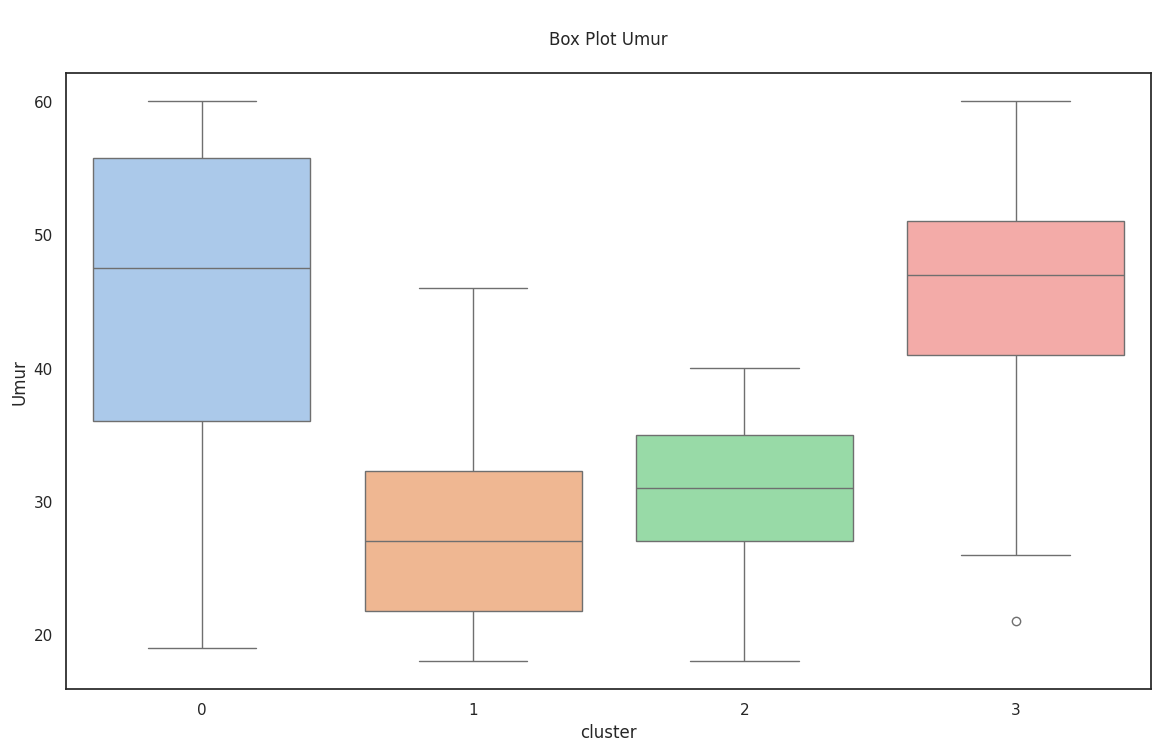

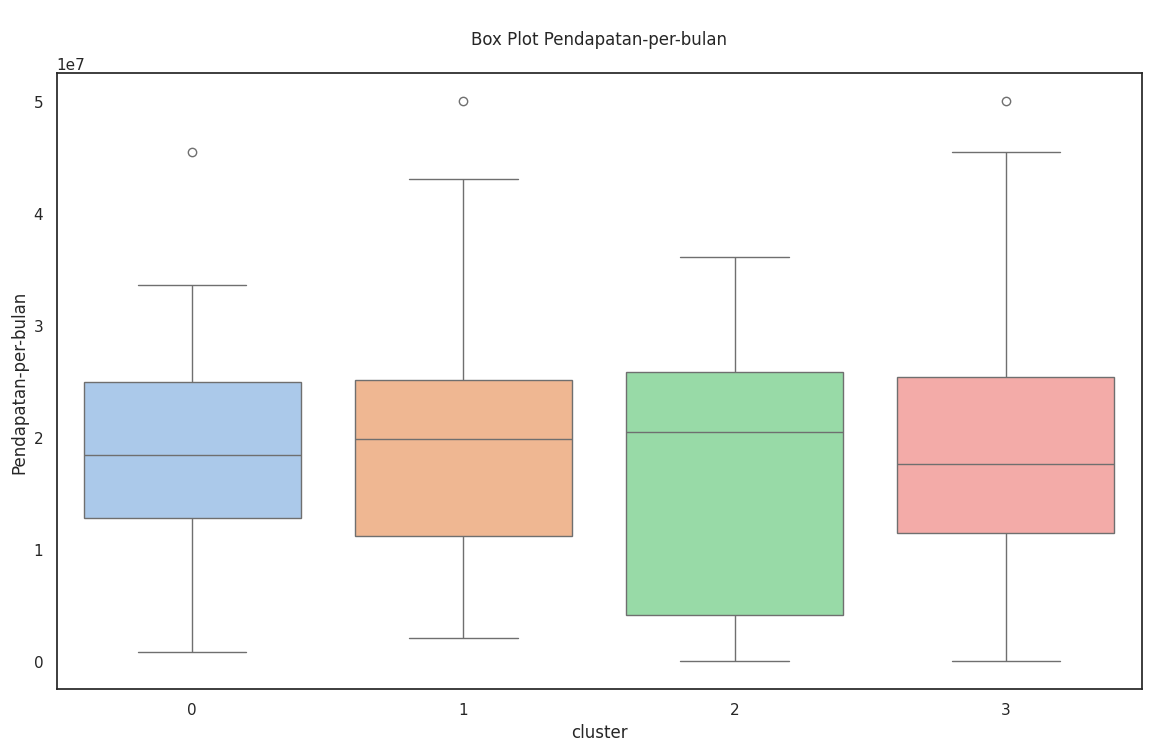

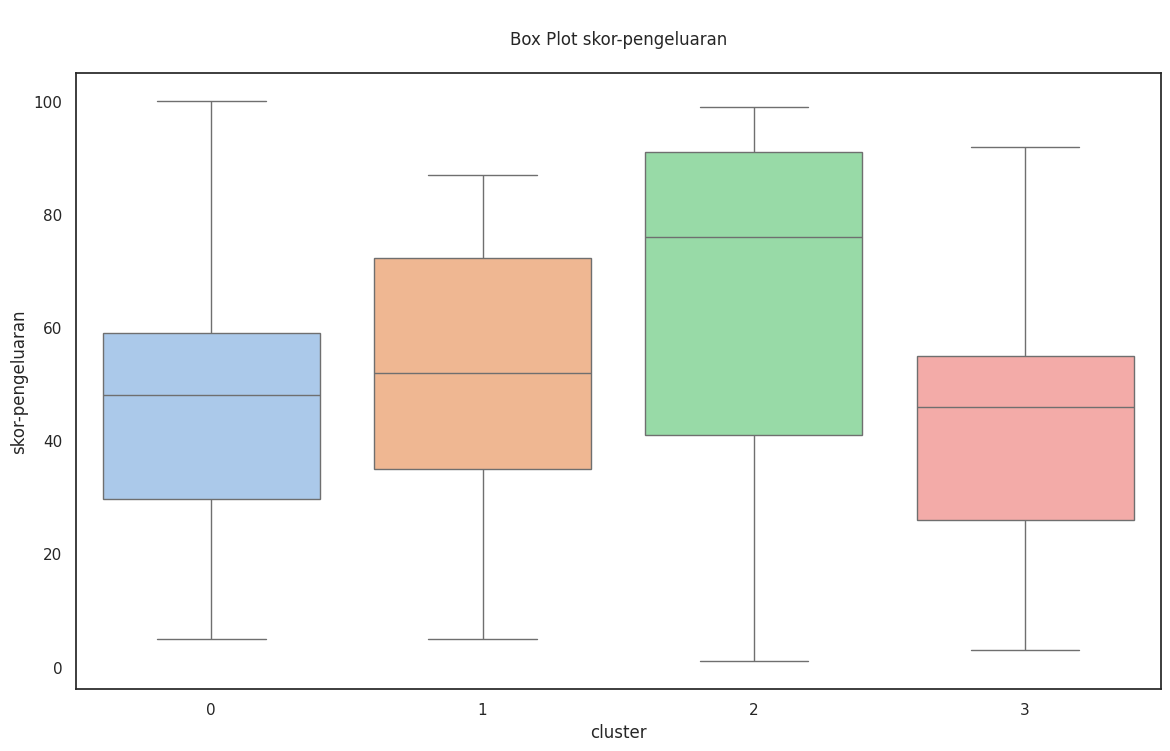

In [523]:
# Visualisasi Hasil Clustering
for i in kolom_numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = Data_final, palette='pastel')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

*1. Berdasarkan Distribusi Umur*

Cluster 0 dan 3 didominasi pelanggan dengan rentang usia luas dan cenderung lebih tua. Cluster 1 berisi pelanggan muda, sedangkan Cluster 2 berusia menengah.

*Rekomendasi:* Fokuskan produk premium dan kenyamanan untuk Cluster 0 & 3, promosi digital dan tren untuk Cluster 1, serta paket keluarga atau bundling menarik untuk Cluster 2.

*2. Berdasarkan Distribusi Pendapatan-per-bulan*

Cluster 0 dan 3 memiliki variasi pendapatan besar, termasuk pelanggan berpenghasilan tinggi. Cluster 1 dan 2 memiliki pendapatan yang lebih stabil, dengan Cluster 2 paling merata.

*Rekomendasi:* Terapkan tiered pricing (hemat dan premium) untuk Cluster 0 & 3, berikan promosi harga dan limited offers untuk Cluster 1, serta jaga keseimbangan harga dan kualitas untuk Cluster 2.

*3. Berdasarkan Distribusi Skor Pengeluaran*

Cluster 0 dan 3 menunjukkan pola pengeluaran yang beragam, Cluster 2 memiliki skor pengeluaran tertinggi dan stabil, sementara Cluster 1 lebih moderat.

*Rekomendasi:* Gunakan reward dan personalisasi untuk Cluster 0 & 3, program loyalitas eksklusif untuk Cluster 2, serta promosi berjenjang (buy more, save more) untuk Cluster 1.

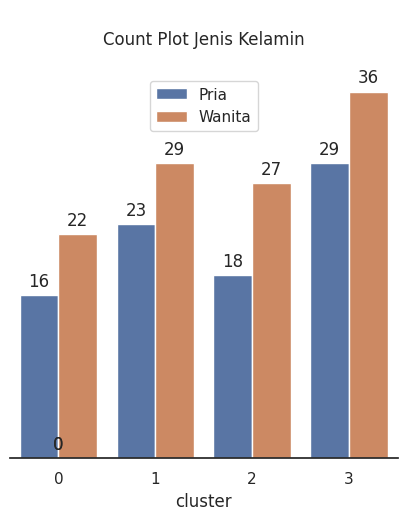

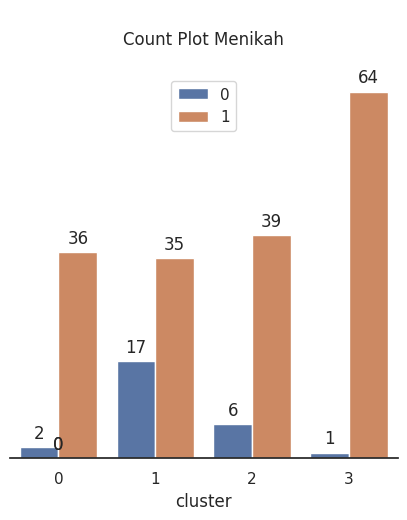

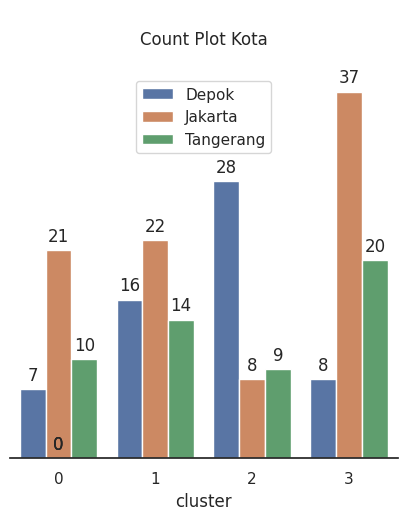

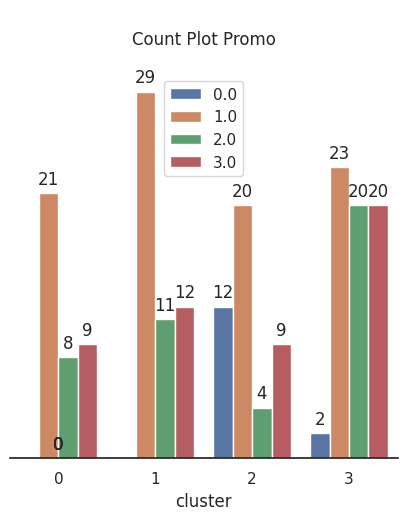

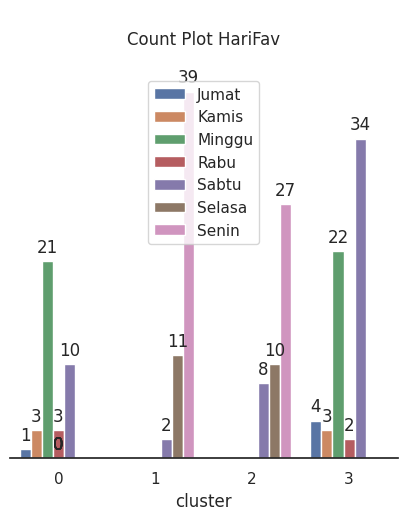

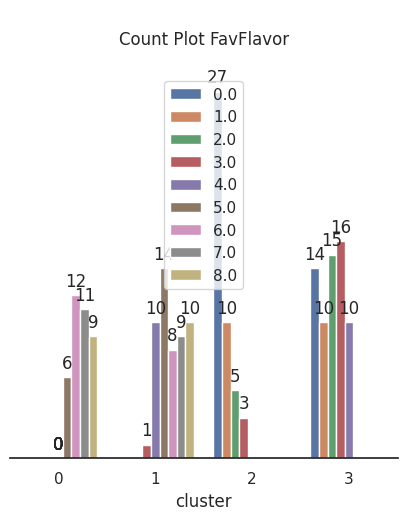

In [524]:
# Visualisasi Hasil Clustering-Count Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Loop over the categorical columns
for i in kolom_kategorik:
    plt.figure(figsize=(5, 5))

    # Create countplot with clusters and categorical variable
    ax = sns.countplot(data=Data_final, x='cluster', hue=i)
    plt.title(f'\nCount Plot {i}\n', fontsize=12)
    ax.legend(loc="upper center")

    # Add annotations for each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  # Display the height of the bar
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of each bar
                    ha='center', va='center', xytext=(0, 10),  # Offset the text by 10 points in y direction
                    textcoords='offset points')

    # Clean up the plot
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)  # Hide the y-axis labels and ticks
    plt.show()

*1. Berdasarkan Jenis Kelamin*

* *Insight:*
  Mayoritas pelanggan berasal dari kalangan *wanita, terutama pada **cluster 0, 1, dan 2, sedangkan **cluster 3* menunjukkan komposisi yang lebih seimbang antara pria dan wanita.
* *Rekomendasi:*
  Fokuskan kampanye pemasaran pada preferensi wanita seperti promo dengan tema self-reward atau lifestyle, namun tetap sertakan strategi khusus pria di cluster 3 untuk memperluas segmen pasar.

---

*2. Berdasarkan Status Menikah*

* *Insight:*
  Hampir seluruh pelanggan pada semua cluster merupakan *pelanggan yang sudah menikah*, sementara pelanggan yang belum menikah relatif sedikit.
* *Rekomendasi:*
  Buat program family bundle atau promo “beli untuk keluarga” untuk memperkuat loyalitas pelanggan berstatus menikah, sekaligus menambah nilai pembelian per transaksi.

---

*3. Berdasarkan Kota*

* *Insight:*
  Pelanggan terbanyak berasal dari *Jakarta* (terutama pada cluster 0 dan 3), diikuti oleh *Depok* (cluster 1) dan *Tangerang* (cluster 2).
* *Rekomendasi:*
  Pertahankan pelanggan di Jakarta dengan promosi lokal dan kemudahan akses produk. Gunakan digital marketing atau media sosial untuk meningkatkan penetrasi pasar di Depok dan Tangerang.

---

*4. Berdasarkan Promo*

* *Insight:*
  *Cluster 1 dan 3* paling banyak menggunakan *promo tipe 1 dan 2, sedangkan **cluster 0* relatif jarang menggunakan promo, dan *cluster 2* menunjukkan variasi respons yang seimbang terhadap berbagai jenis promo.
* *Rekomendasi:*
  Pertahankan promo populer (tipe 1 dan 2) untuk pelanggan yang sensitif terhadap diskon. Lakukan uji coba A/B testing untuk menilai efektivitas promo baru pada pelanggan cluster lain.

---

*5. Berdasarkan Hari Favorit*

* *Insight:*
  Pola pembelian terbagi menjadi dua kelompok:

  * *Cluster 0 & 3:* dominan di *akhir pekan (Sabtu–Minggu)*
  * *Cluster 1:* aktif di *hari kerja (Senin–Rabu)*
  * *Cluster 2:* cenderung merata namun sedikit lebih aktif di Sabtu
* *Rekomendasi:*
  Luncurkan promo bertema *Weekend Deals* untuk pelanggan akhir pekan dan *Midweek Discount* atau “Coffee Break Promo” untuk pelanggan yang berbelanja di hari kerja.

---

*6. Berdasarkan Rasa Favorit*

* *Insight:*
  Tiap cluster memiliki preferensi rasa yang berbeda. *Cluster 3* cenderung eksploratif karena menyukai berbagai varian rasa, sedangkan *cluster 1* lebih fokus pada rasa tertentu (nilai 0–2 dominan).
* *Rekomendasi:*
  Tawarkan program “Coba Rasa Baru Setiap Bulan” untuk pelanggan eksploratif dan berikan promo loyalitas bagi pelanggan yang konsisten membeli rasa favorit mereka.

---

*Kesimpulan Umum*

Secara keseluruhan, segmen utama pelanggan adalah *wanita menikah* dari *Jakarta dan Depok, dengan kecenderungan berbelanja di **akhir pekan* dan *responsif terhadap promo* tertentu. Strategi pemasaran yang berfokus pada *pengalaman pelanggan, personalisasi promo, dan variasi produk* akan membantu meningkatkan loyalitas serta memperluas pasar di segmen potensial lainnya.

In [525]:
# Menamakan cluster
# Mapping nama kolom
Data_final['Segmen'] = Data_final['cluster'].map({
0: 'Regular Member',
1: 'Premium Member',
2: 'VIP Member',
3: 'Elite Member'
})

print(Data_final.info())
print(Data_final.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         200 non-null    category
 1   Umur                  200 non-null    int64   
 2   Pendapatan-per-bulan  200 non-null    int64   
 3   skor-pengeluaran      200 non-null    int64   
 4   Menikah               200 non-null    category
 5   Kota                  200 non-null    category
 6   Promo                 200 non-null    category
 7   HariFav               200 non-null    category
 8   FavFlavor             200 non-null    category
 9   cluster               200 non-null    uint16  
 10  Segmen                200 non-null    object  
dtypes: category(6), int64(3), object(1), uint16(1)
memory usage: 9.2+ KB
None
  Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0        Wanita    49              13114754                52      

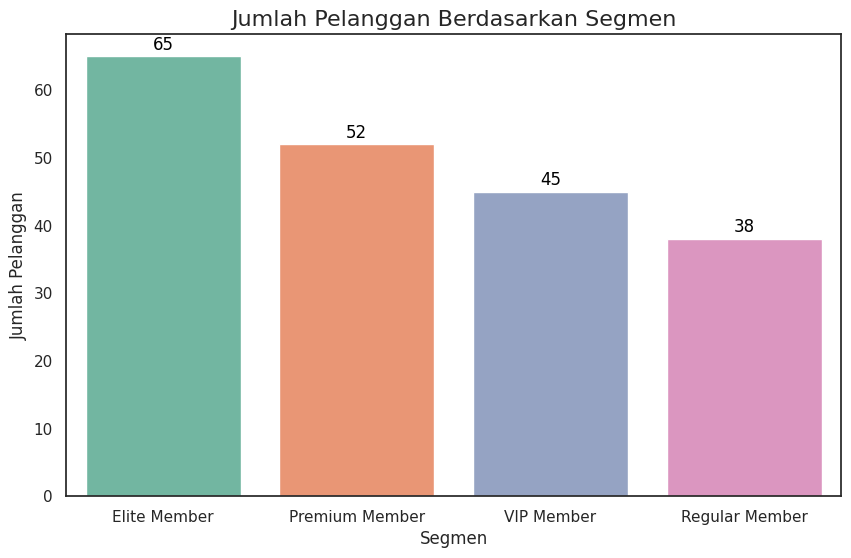

In [526]:
# Menyiapkan ukuran gambar agar lebih besar
plt.figure(figsize=(10, 6))

# Membuat barplot untuk menampilkan jumlah pelanggan berdasarkan segmen
sns.barplot(x=Data_final['Segmen'].value_counts().index,
            y=Data_final['Segmen'].value_counts().values,
            palette='Set2')

# Memberikan judul dan label pada grafik
plt.title('Jumlah Pelanggan Berdasarkan Segmen', fontsize=16)
plt.xlabel('Segmen', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Menambahkan jumlah total di atas setiap bar
total_counts = Data_final['Segmen'].value_counts()
for i, count in enumerate(total_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12, color='black')

# Menampilkan plot
plt.show()

**Segmen Keanggotaan Pelanggan**

**Insight:**
Segmen **Elite Member** memiliki jumlah pelanggan tertinggi, yaitu **65 orang**, menunjukkan bahwa program ini menawarkan keuntungan eksklusif yang sangat menarik bagi pelanggan. Sementara itu, **Premium Member (52 pelanggan)** dan **VIP Member (45 pelanggan)** memiliki jumlah yang cukup seimbang dan menunjukkan adanya potensi besar untuk peningkatan loyalitas. Di sisi lain, **Regular Member** memiliki jumlah paling sedikit (**38 pelanggan**), yang mengindikasikan bahwa segmen ini mungkin kurang menarik atau belum memiliki nilai tambah yang cukup dibandingkan level keanggotaan lainnya.

**Rekomendasi:**
MixITup perlu mempertahankan loyalitas pelanggan **Elite Member** dengan memberikan program khusus, seperti *exclusive rewards*, *bonus poin bulanan*, atau *early access* untuk produk baru. Untuk **Premium** dan **VIP Member**, perusahaan dapat mendorong peningkatan status keanggotaan dengan menawarkan promo *upgrade tier* atau manfaat tambahan, seperti diskon eksklusif atau bonus transaksi tertentu.
Sementara itu, bagi **Regular Member**, perlu dilakukan analisis lebih lanjut untuk memahami penyebab rendahnya jumlah anggota. MixITup dapat memperkuat penawaran dengan memberikan insentif menarik seperti *welcome bonus* atau *loyalty challenge* yang mendorong mereka naik ke tingkat keanggotaan yang lebih tinggi.

Dengan strategi yang berfokus pada diferensiasi manfaat dan peningkatan loyalitas berdasarkan segmen, MixITup dapat memperkuat basis pelanggan yang sudah ada sekaligus mendorong pertumbuhan di segmen potensial seperti Premium dan VIP.

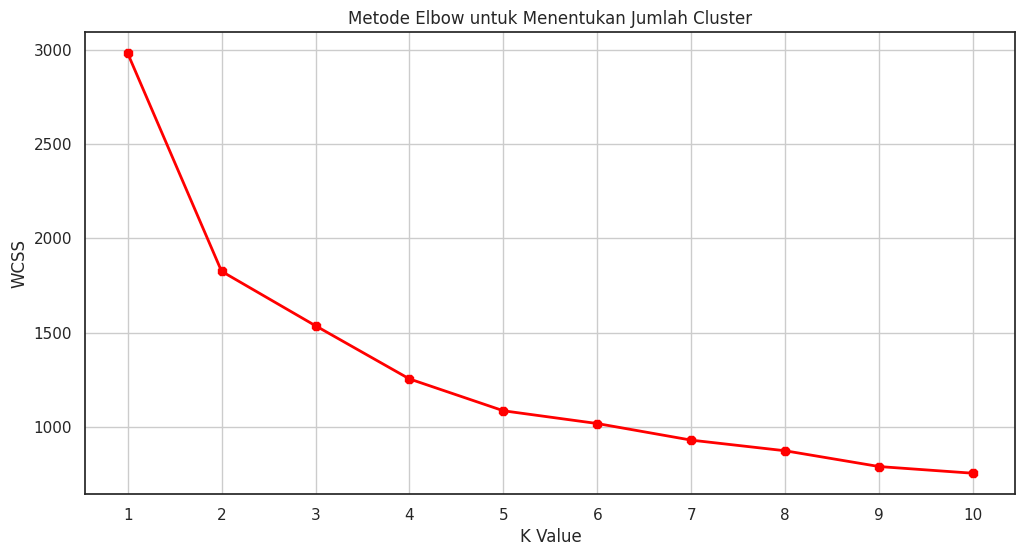

In [527]:
# Menggunakan K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

wcss = []
for k in range(1, 11):
    # tambahkan random_state agar hasil stabil
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(Data_model.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("WCSS")
plt.title("Metode Elbow untuk Menentukan Jumlah Cluster")
plt.show()

In [528]:
from sklearn import cluster, datasets
random_state = 0

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

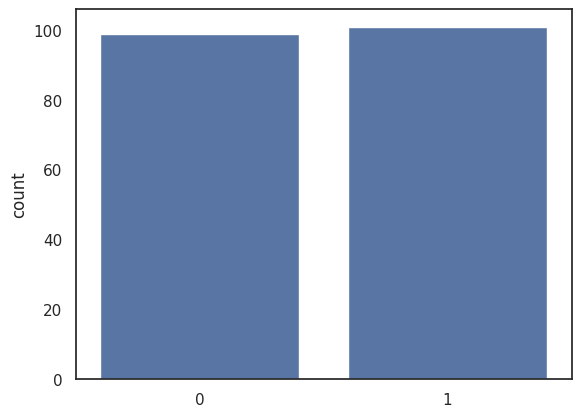

In [529]:
# k-means++ clustering
k = 2
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(Data_model)
C_kmpp = kmPP.predict(Data_model)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

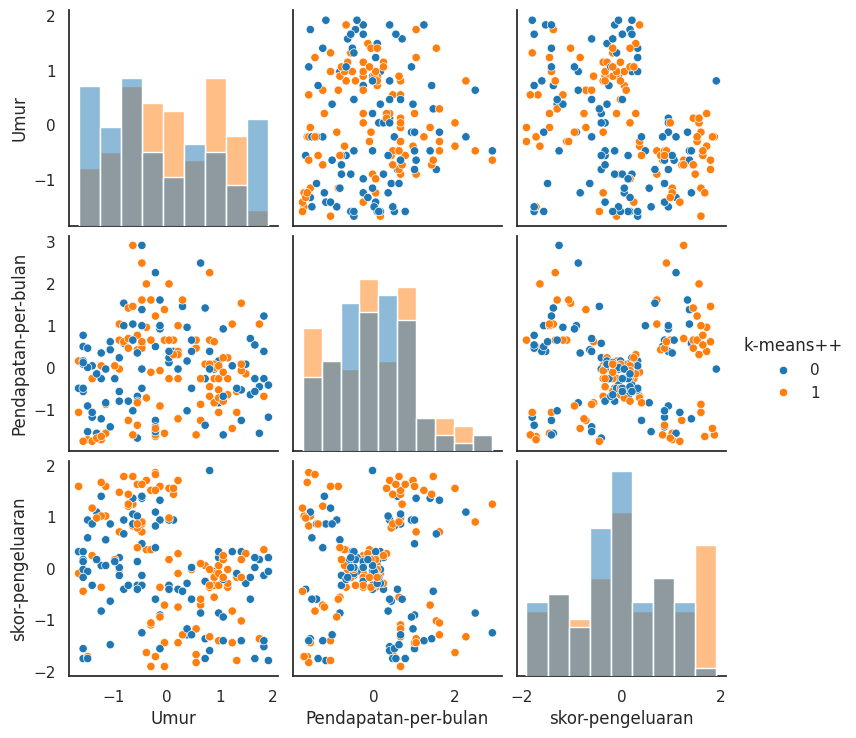

In [530]:
Data_model['k-means++'] = C_kmpp
g = sns.pairplot(Data_model[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

**Analisis Hasil Clustering K-Means++**

**Interpretasi Hasil**

1. **Distribusi Umur dan Pendapatan**
   Dari grafik, terlihat bahwa kedua cluster memiliki sebaran umur dan pendapatan yang relatif merata. Namun, pelanggan dalam **Cluster 1 (oranye)** sedikit lebih banyak berasal dari kelompok **usia muda dengan pendapatan menengah ke tinggi**, sedangkan **Cluster 0 (biru)** cenderung berisi pelanggan dengan **usia lebih tua**.

2. **Pendapatan dan Skor Pengeluaran**
   Pola persebaran menunjukkan perbedaan yang lebih jelas. **Cluster 1 (oranye)** memiliki **skor pengeluaran lebih tinggi**, menandakan kelompok pelanggan yang lebih aktif berbelanja dan cenderung konsumtif.
   Sementara itu, **Cluster 0 (biru)** berisi pelanggan dengan **skor pengeluaran lebih rendah**, meskipun beberapa di antaranya memiliki pendapatan yang sama.

3. **Umur dan Skor Pengeluaran**
   Terlihat bahwa pelanggan muda lebih dominan di **Cluster 1**, dengan kecenderungan melakukan pembelian lebih banyak atau lebih sering. Pelanggan yang lebih tua di **Cluster 0** tampak lebih hemat atau selektif dalam pengeluaran.

---

 **Kesimpulan Cluster**

* **Cluster 0 (Biru):**

  * Ciri: Usia relatif lebih tua, skor pengeluaran rendah.
  * Karakter: Pelanggan rasional dan berhati-hati dalam berbelanja.
  * Potensi: Perlu pendekatan berbasis nilai dan loyalitas jangka panjang.

* **Cluster 1 (Oranye):**

  * Ciri: Usia lebih muda, skor pengeluaran tinggi.
  * Karakter: Lebih impulsif, responsif terhadap promosi dan tren baru.
  * Potensi: Menjadi target utama untuk promosi digital dan kampanye kreatif.

---
**Rekomendasi Strategi untuk MixITup**

1. **Untuk Cluster 1 (Pelanggan Aktif dan Konsumtif):**

   * Gunakan strategi **promosi berbasis digital** seperti kampanye media sosial, giveaway, atau kolaborasi dengan influencer.
   * Berikan **voucher eksklusif atau poin reward** untuk meningkatkan frekuensi pembelian.
   * Dorong partisipasi dalam event loyalitas, misalnya *“Elite Challenge”* bagi pelanggan aktif.

2. **Untuk Cluster 0 (Pelanggan Rasional dan Stabil):**

   * Tawarkan **program loyalitas jangka panjang** seperti diskon untuk pembelian rutin atau paket hemat bulanan.
   * Gunakan pendekatan komunikasi yang menonjolkan **nilai dan kualitas produk**.
   * Berikan insentif seperti **upgrade keanggotaan** setelah jumlah pembelian tertentu.

# **Kesimpulan Akhir**


1. Profil Pelanggan Dominan
Mayoritas pelanggan MixITup adalah wanita (114 orang) dan sudah menikah (174 orang), menunjukkan bahwa pasar utama perusahaan berada pada segmen keluarga.

2. Segmentasi Berdasarkan K-Prototypes
Analisis K-Prototypes menghasilkan empat segmen utama: Regular Member, Premium Member, VIP Member, dan Elite Member. Segmen Elite Member menjadi kelompok terbesar (65 pelanggan), menandakan tingginya minat terhadap program keanggotaan eksklusif.

3. Karakteristik Berdasarkan K-Means++
Analisis K-Means++ membagi pelanggan menjadi dua cluster utama berdasarkan variabel numerik:

* *Cluster 0 (Rasional & Stabil):* Pelanggan berusia lebih tua dengan skor
pengeluaran rendah, menunjukkan perilaku pembelian yang hati-hati dan terukur.
* *Cluster 1 (Aktif & Konsumtif):* Pelanggan lebih muda dengan skor pengeluaran tinggi, cenderung responsif terhadap tren dan promosi.

4. Pengaruh Variabel Demografis
Jenis kelamin dan status pernikahan berperan penting dalam membentuk segmentasi pelanggan. Selain itu, kota asal (Jakarta, Depok, Tangerang) juga menunjukkan korelasi dengan intensitas penggunaan promo dan tingkat pengeluaran.

5. Rekomendasi Strategis
Strategi pemasaran sebaiknya disesuaikan dengan karakteristik segmen. Untuk pelanggan rasional dan lebih tua, fokus pada nilai produk serta program loyalitas jangka panjang. Sementara itu, untuk pelanggan muda dan konsumtif, gunakan promosi digital, tren terkini, dan kampanye media sosial. Selain itu, terapkan program loyalitas berjenjang dengan penawaran eksklusif bagi segmen Elite, Premium, dan VIP untuk meningkatkan retensi serta nilai transaksi pelanggan.